![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

**Grupo: Team 11**

DIANA CAROLINA URBANO BURITICA

EDINSON FERNANDEZ BECERRA

DAREN JOAN RODRIGUEZ CACERES

FABIO ANDRES VILLAFANE SANCHEZ


## 1. Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. 

**OBJETIVO** = Predecir el precio del automóvil. 

Plataforma de la competencia: https://www.kaggle.com/competitions/miad2022-12-prediccin-de-precios-de-vehculos/data

La descripción de las variables predictoras se presentan a continuación:

**Year**= Año del modelo del vehiculo

**Mileage**= Número de millas en el odómetro del vehículo

**State**= Estado donde esta listado el modelo

**Make**= Empresa fabricante

**Modelo**= Modelo del vehiculo


### 1.1 Librerias

In [1]:
import warnings
warnings.filterwarnings('ignore')




In [31]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import xgboost as xgb
import math
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from pandas import MultiIndex
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

## 2.Carga de datos de entrenamiento y test

In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [5]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [6]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


### 2.1 Tipos de Variables

In [9]:
dataTraining.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

### 2.2 Datos Nulos

In [10]:
# variables con valores nulos en las variables de entrenamiento train_data
pymesmissed=dataTraining.isnull()
#columnas con valores nulos y su porcentaje
columnas_connull=[]
# porcentajes por columna de valores nulos
porc_valoresnull=[]
for column in pymesmissed.columns.values.tolist():
    
    if ((pymesmissed[column]).value_counts()[0]*100/len(pymesmissed))<100:
        columnas_connull.append(column)
        porc_valoresnull.append(float("{0:.3f}".format((pymesmissed[column]).value_counts()[1]*100/len(pymesmissed))))
        print(column,"% valores no nulos y nulos")
        print ((pymesmissed[column]).value_counts()*100/len(pymesmissed))
        print("")
print ("lista de columnas con valores nulos: ",columnas_connull)

print ("lista porcentajes con valores nulos: ",porc_valoresnull)

lista de columnas con valores nulos:  []
lista porcentajes con valores nulos:  []


No se presentan datos nulos en la base de datos de entrenamiento dataTraining

## 3. Análisis preliminar de variables

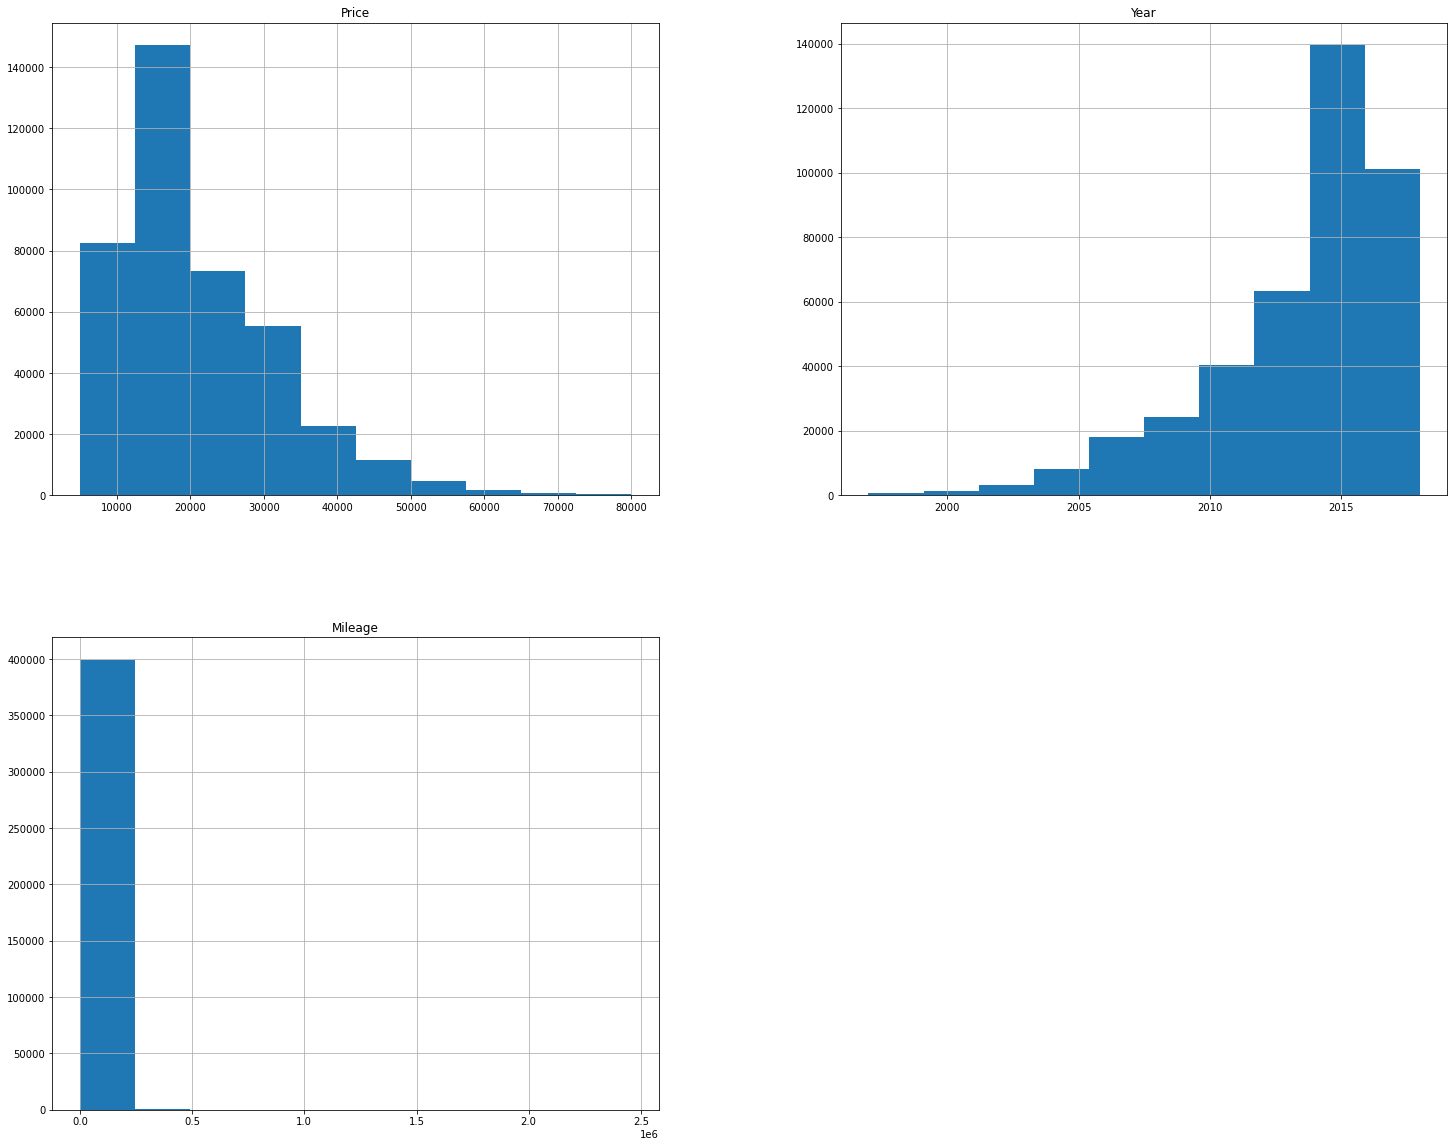

In [112]:
# vista general de los histogramas para las variables predictoras
plt.rcParams["figure.figsize"] = (25,20)
dataTraining.hist()
plt.show()

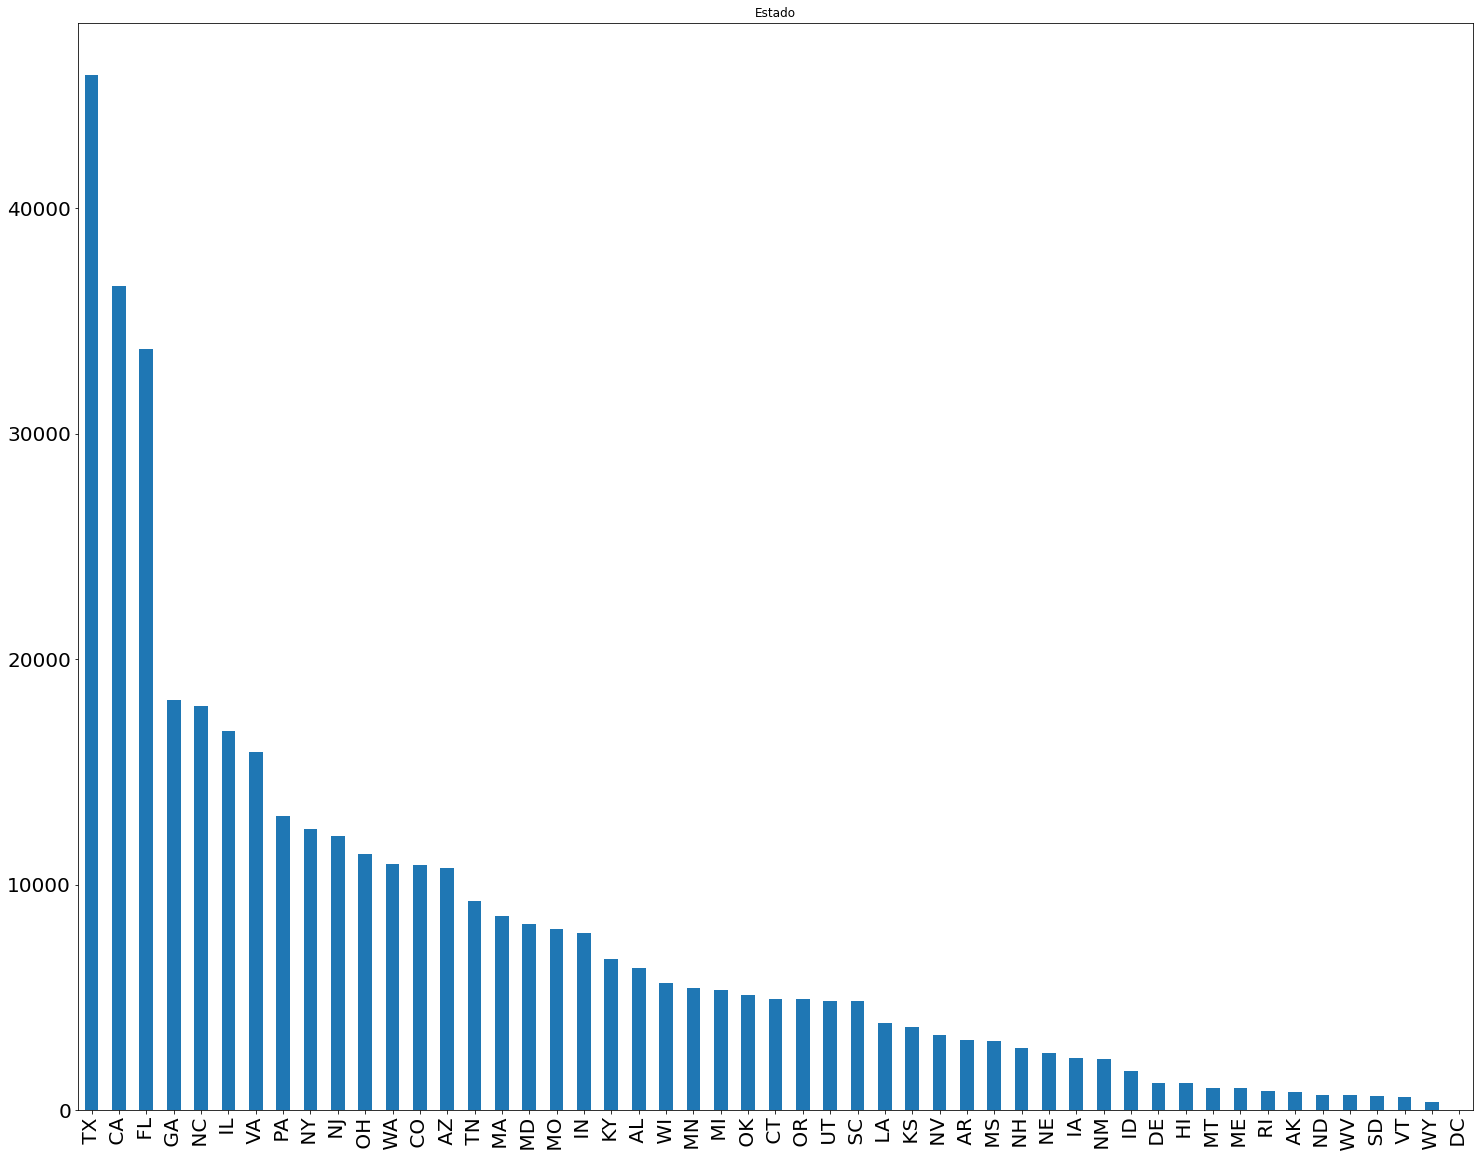

In [113]:
# Estados
plot = (dataTraining['State'].value_counts()).plot(
kind='bar', title='Estado',fontsize=20)

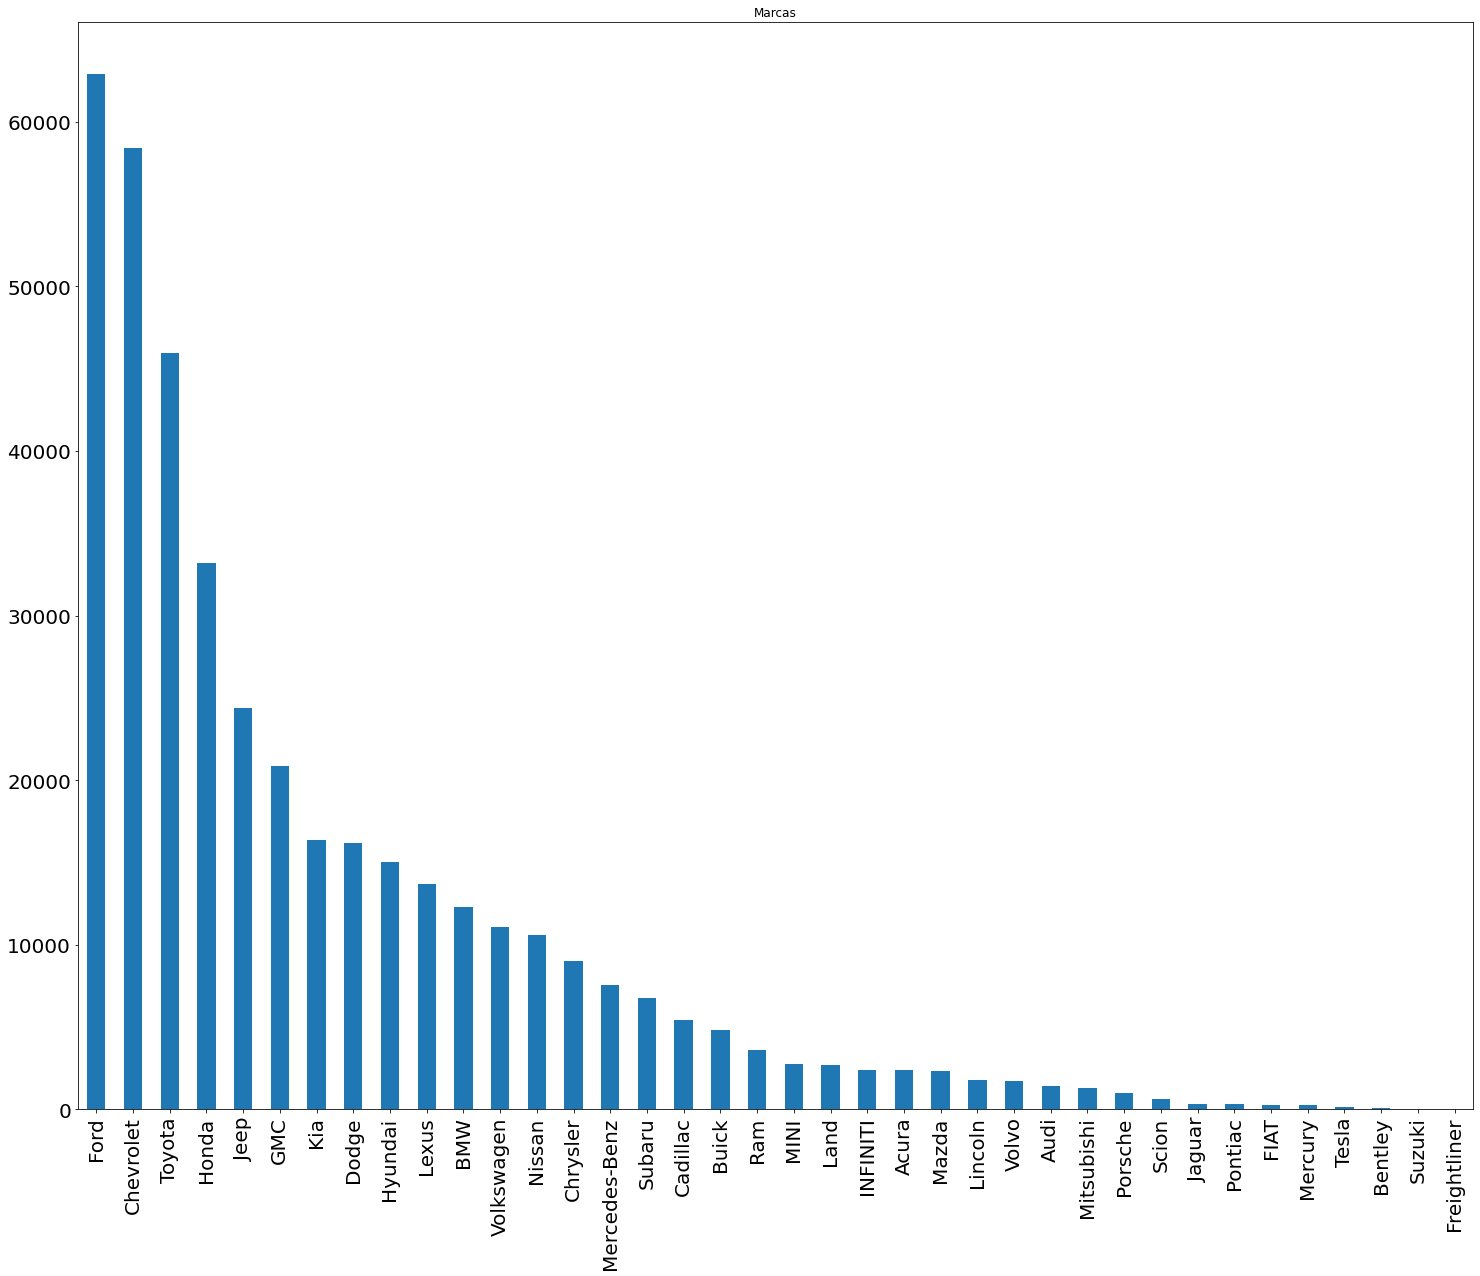

In [114]:
# Marca
plot = (dataTraining['Make'].value_counts()).plot(
kind='bar', title='Marcas',fontsize=20)

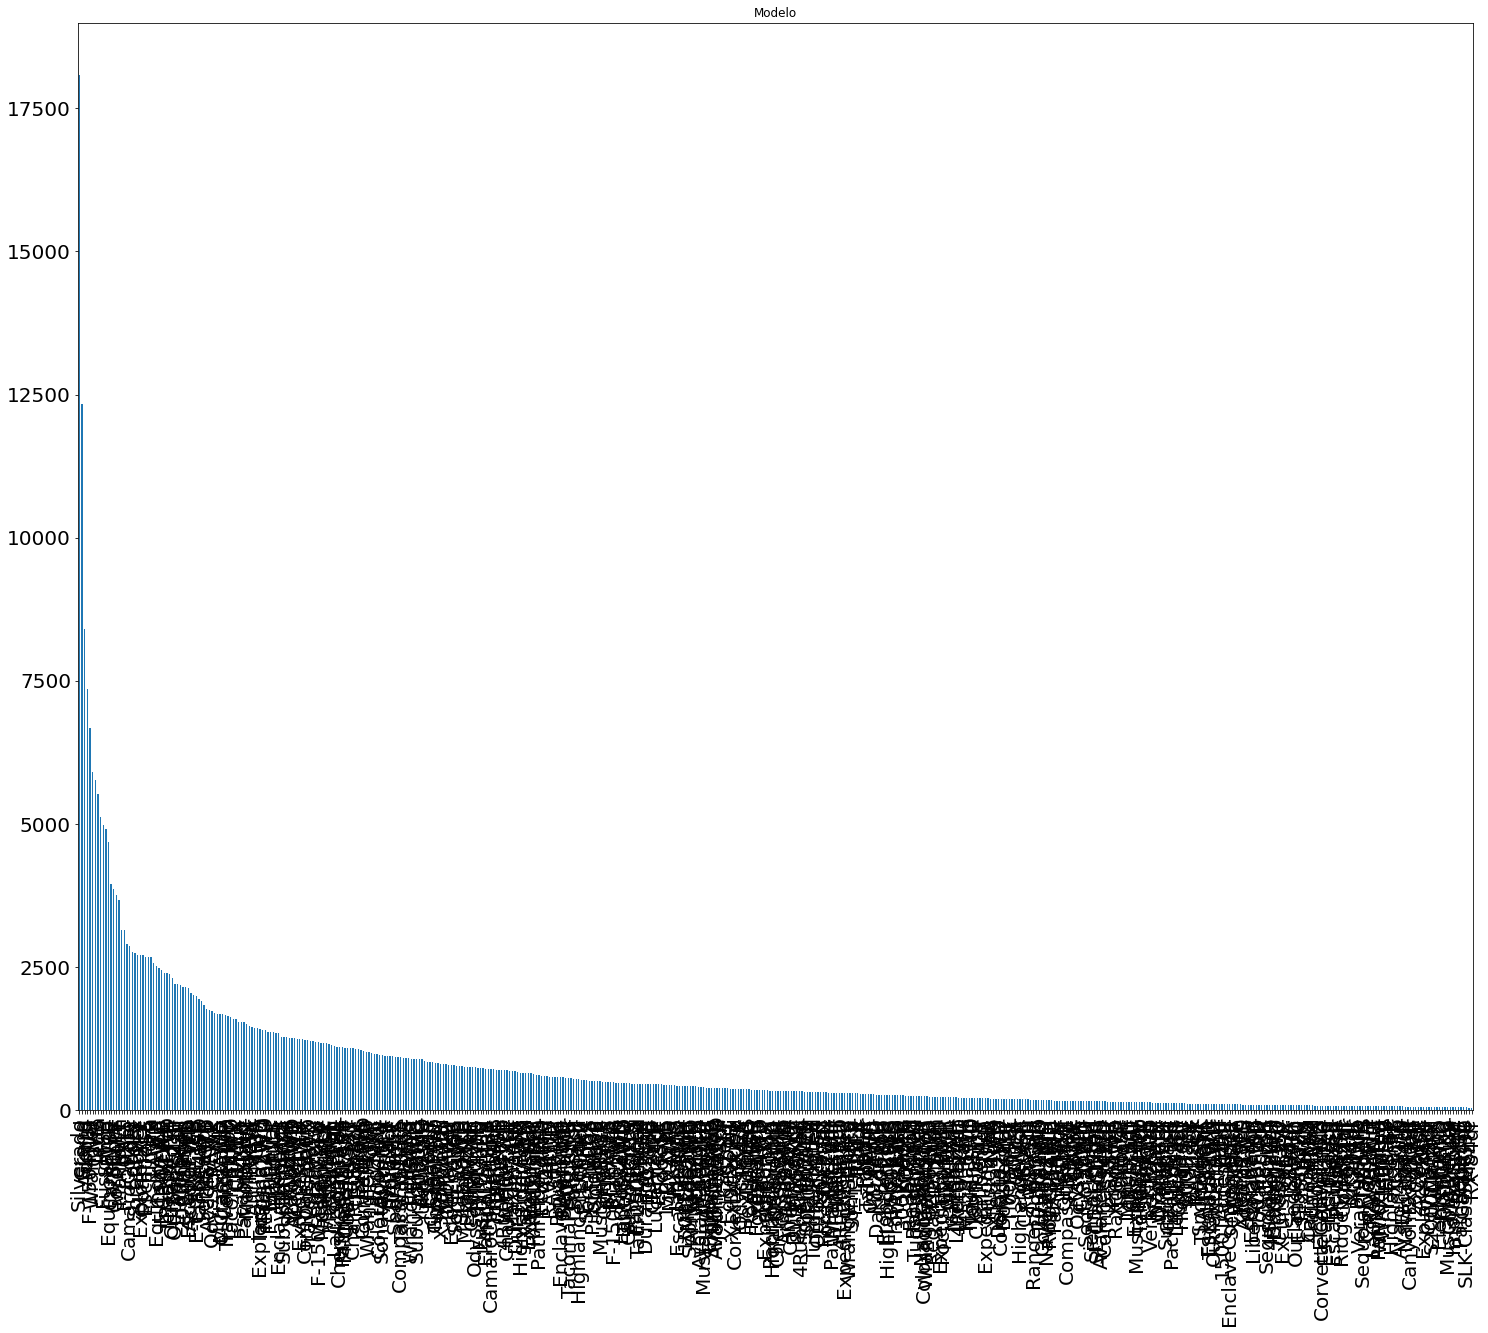

In [115]:
# Modelo
plot = (dataTraining['Model'].value_counts()).plot(
kind='bar', title='Modelo',fontsize=20)

(0.0, 98085.34653043348)

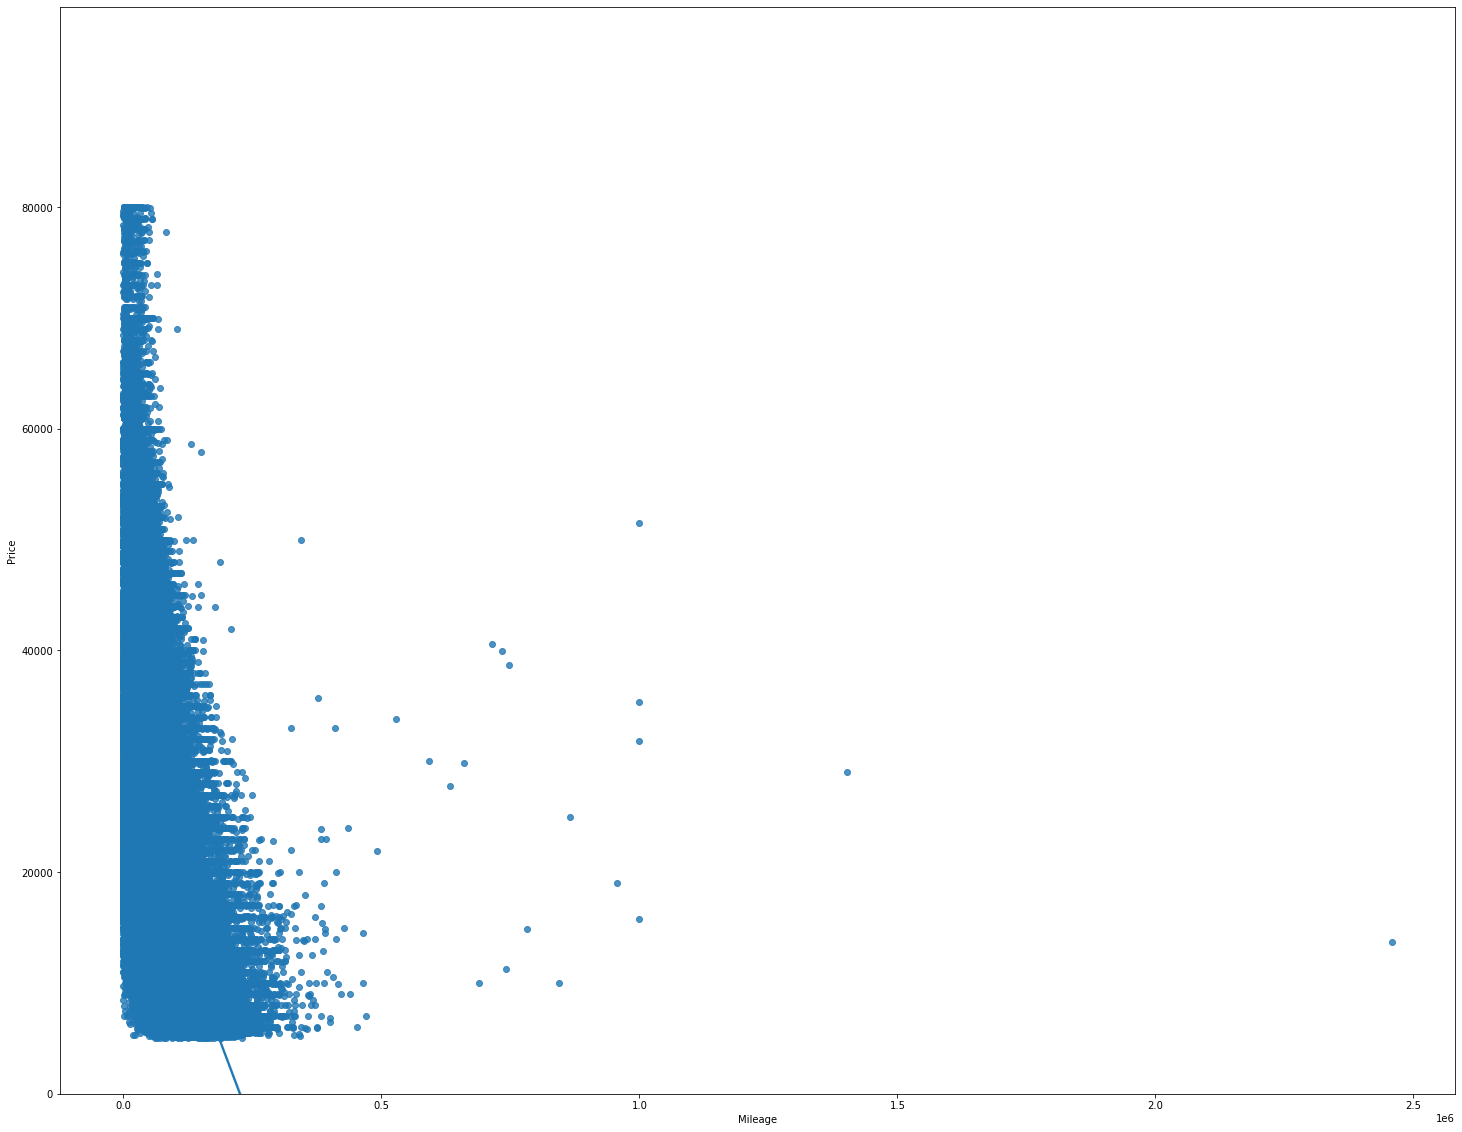

In [16]:
# Mileage vs Price
sns.regplot(x="Mileage", y="Price", data=dataTraining)
plt.ylim(0,)


[]

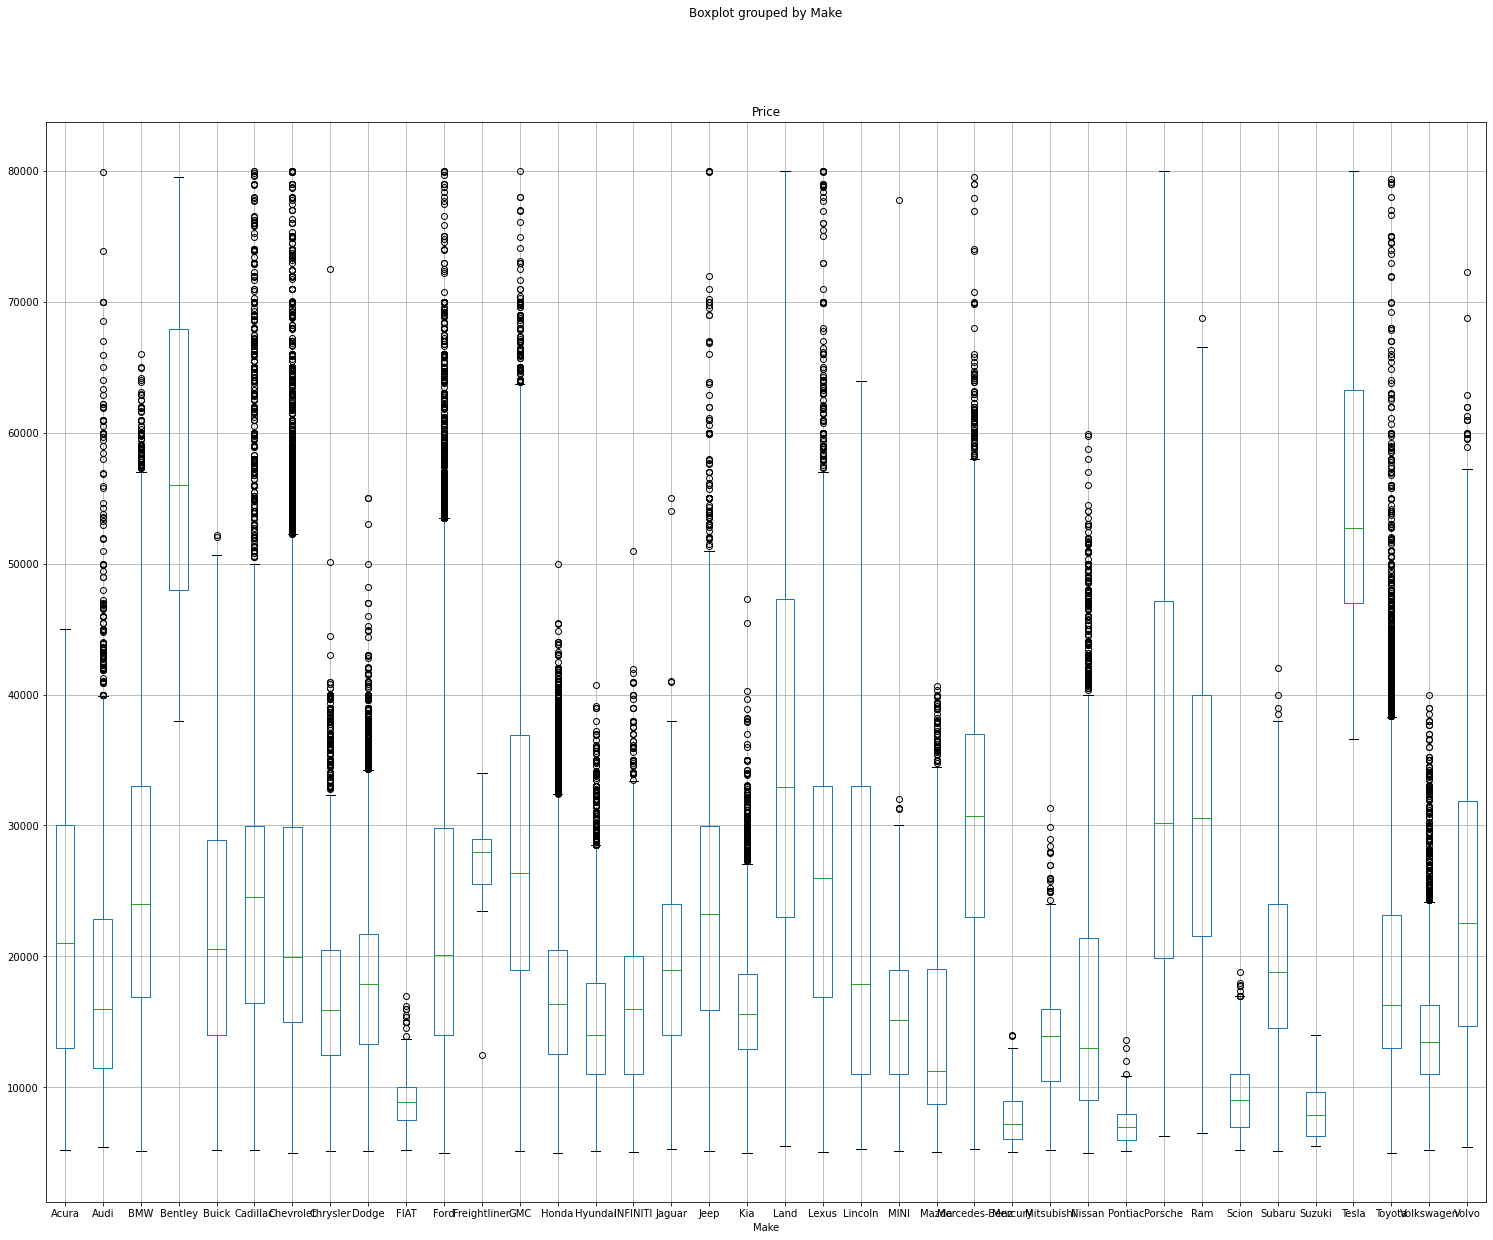

In [17]:
# Make vs Price
boxplot = dataTraining.boxplot(column=['Price'],by="Make")
boxplot.plot()

[]

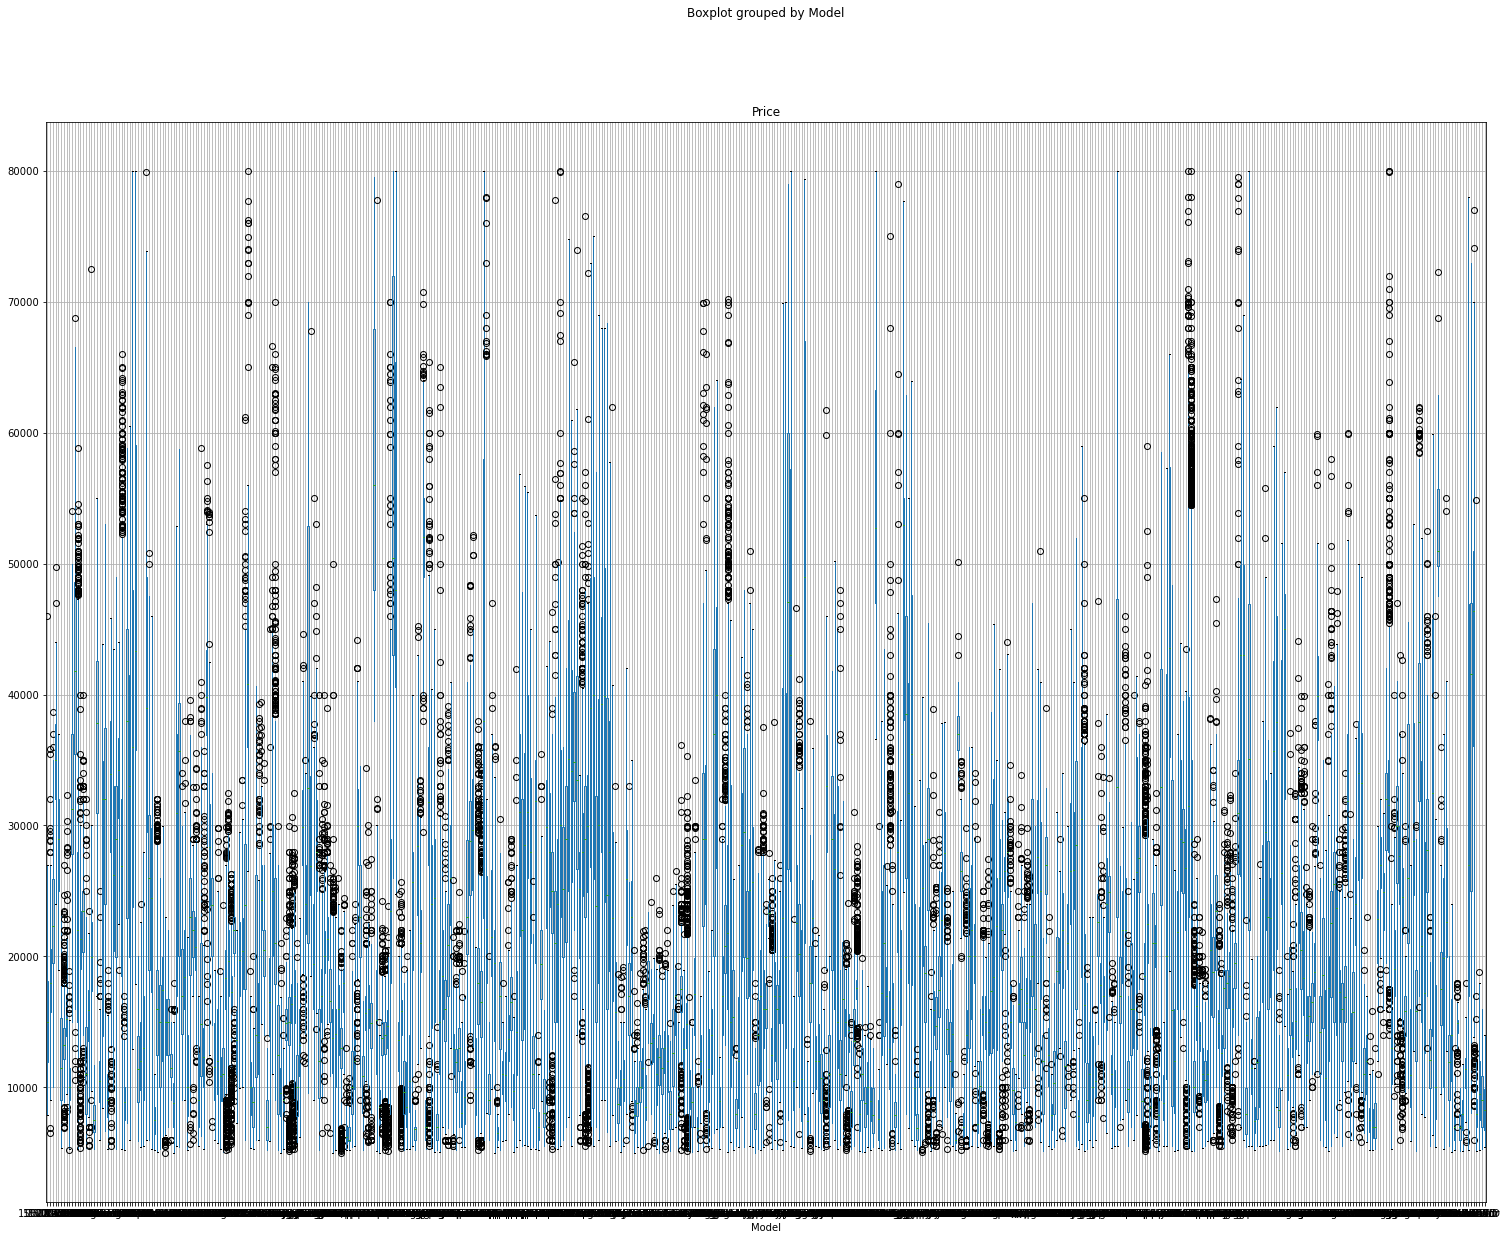

In [18]:
# Model vs Price
boxplot = dataTraining.boxplot(column=['Price'],by="Model")
boxplot.plot()

[]

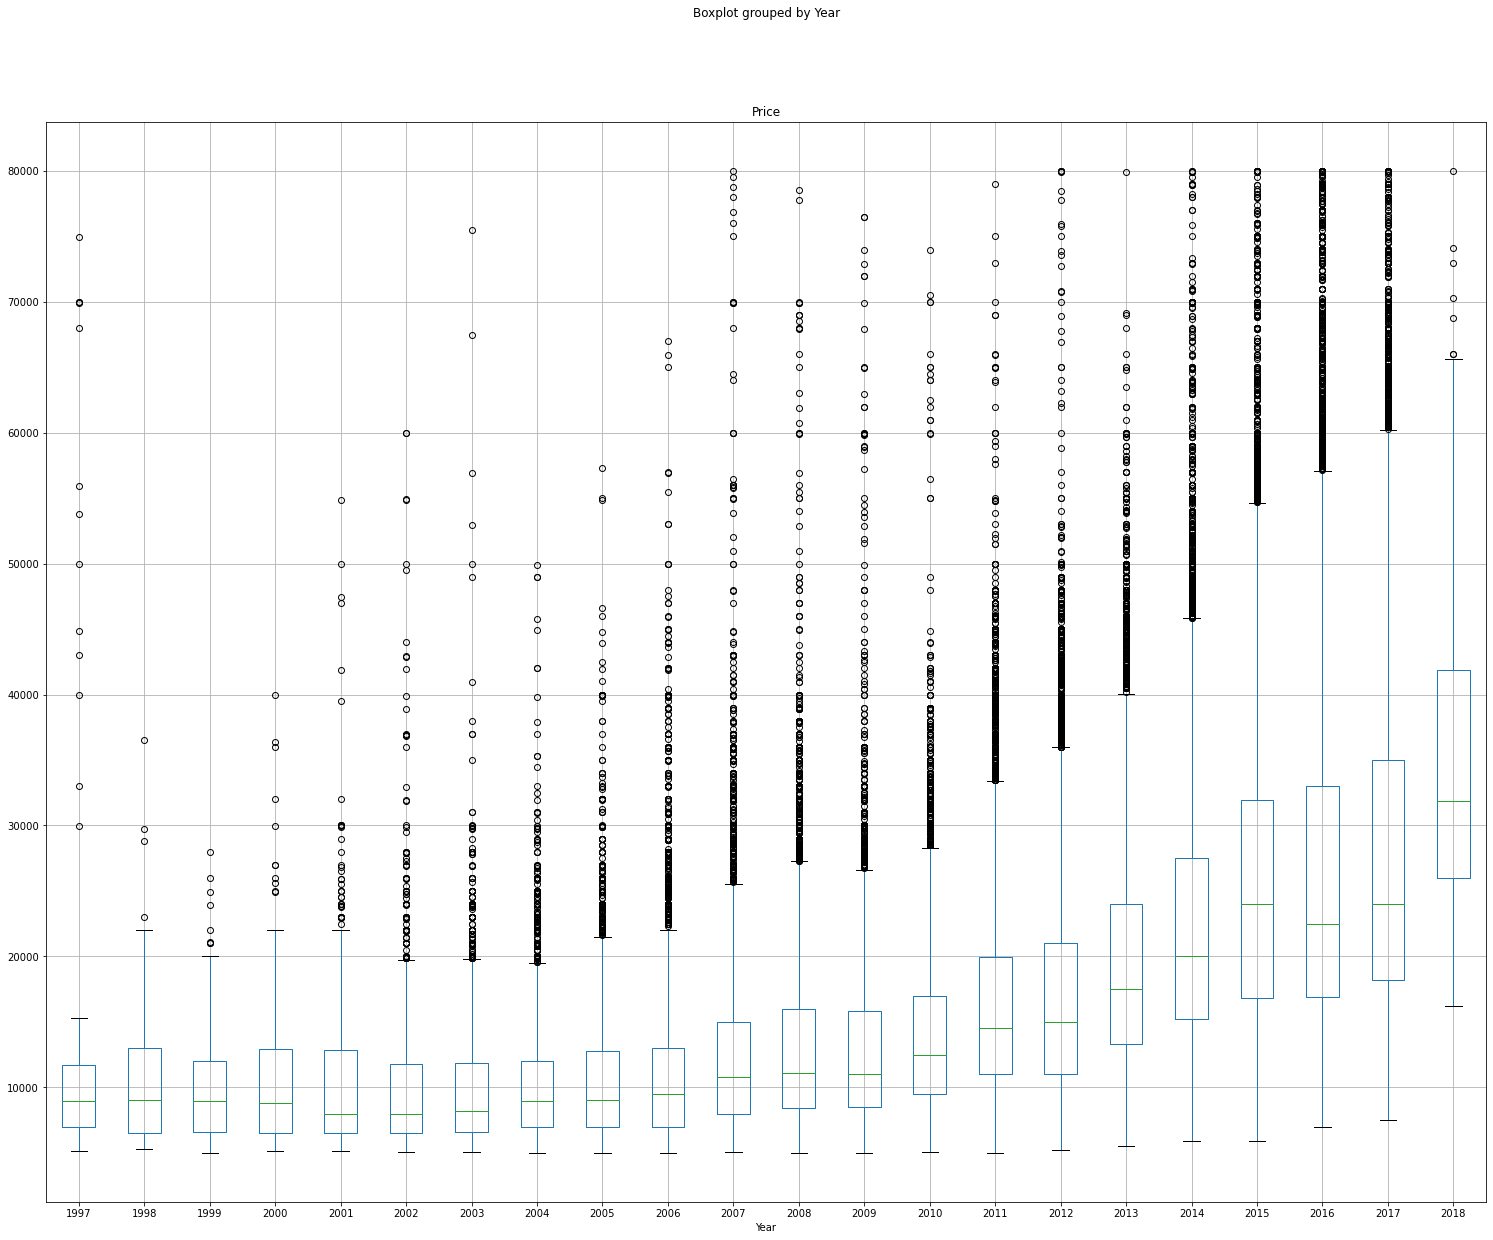

In [116]:
# Year vs Price
boxplot = dataTraining.boxplot(column=['Price'],by="Year")
boxplot.plot()


**Análisis Preliminar de Variables**

El análisis preliminar de variables deja en evidencia una mayor correlación entre los precios y las variables Year y Mileage, para las variables Make, State, Model la relación es mas compleja y requiere convertir las variables categóricas a dummies para entender mucho mejor su relación con la variable precio

## 4. Creación de variables Dummy

In [117]:
# Se genera una copia de la base de datos de entrenamiento
df=dataTraining.copy()

df.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [13]:
# Nuevo data set con las variables categoricas como dummies
data=pd.get_dummies(df)
data.head()

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(400000, 617)

## 5 Partición y Transformación de variables

In [20]:
#Se separa X y Y
XTotal=data.loc[:,data.columns!='Price']
yTotal=data.loc[:,data.columns=='Price']

XTotal.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,2017,9913,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,20578,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,83716,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,28729,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,64032,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# correlacion entre variables predictoras y variables de respuesta
corr = data.corr()
c=corr[['Price']].sort_values(by = 'Price',ascending = False).style.background_gradient()
c

,Price
Price,1.000000
Year,0.479765
Model_Silverado,0.162371
Make_GMC,0.161459
Model_Sierra,0.146910
Model_Super,0.125559
Model_Wrangler,0.120252
Model_Rover,0.115613
Make_Land,0.115613
Make_Mercedes-Benz,0.114665


In [21]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XTotal, yTotal, test_size=0.33, random_state=42)

## 6. Calibración de parámetros XGBOOST

### Parámetros a calibrar

**learning rate**:Es el porcentaje de cambio con el que se actualizan los pesos en cada iteración, cada vez que se realiza una iteración en el proceso de entrenamiento se deben actualizar los pesos de la entrada para poder dar cada vez una mejor aproximación.Demasiada tasa de aprendizaje conduce a la inestabilidad del aprendizaje, y un valor demasiado pequeño conduce a un tiempo de capacitación extremadamente largo. La tasa de aprendizaje adaptativo alcanza una tasa razonablemente alta bajo la premisa de garantizar un entrenamiento estable, lo que puede reducir el tiempo de entrenamiento.
El learning rate nos dice que tanto actualizamos los pesos en cada iteración, en un rango de 0 a 1.

**colsample_bytree**: Se usa para controlar la proporción del número de columnas muestreadas al azar (cada columna es una característica). Valores en un rango de 0 a 1.

**gamma**:Cuando un nodo se divide, el nodo solo se dividirá si el valor de la función de pérdida cae después de la división. Gamma especifica la caída de la función de pérdida mínima requerida para la división de nodos.
Cuanto mayor sea el valor de este parámetro, más conservador será el algoritmo. Valores de 0 a 1

**subsample**= Proporción de submuestra de las instancias de entrenamiento. Establecerlo en 0.5 significa que XGBoost muestrearía aleatoriamente la mitad de los datos de entrenamiento antes de cultivar árboles. y esto evitará el sobreajuste. El submuestreo ocurrirá una vez en cada iteración de impulso. Valores en el rango: (0,1]

**Max_depth**=Profundidad máxima de un árbol. Aumentar este valor hará que el modelo sea más complejo y más propenso a sobreajustarse. 0 indica que no hay límite de profundidad. Tenga en cuenta que XGBoost consume memoria de forma agresiva cuando entrena un árbol profundo. el método de árbol exacto requiere un valor distinto de cero. Valoren en el rango: [0,∞]

**min_child_weight**= En la tarea de regresión lineal, esto simplemente corresponde al número mínimo de instancias necesarias para estar en cada nodo. Cuanto mayor sea min_child_weight, más conservador será el algoritmo. Valores en rango: [0,∞]

**reg_alpha**= Término de regularización L1 sobre pesos. Aumentar este valor hará que el modelo sea más conservador.

### Grid Search

Pasamos un diccionario de parámetros a la función,luego comparamos el puntaje de validación cruzada para cada combinación de parámetros(muchos a muchos) en el diccionario y se devuelve el conjunto que tiene los mejores valores de los parámetros.

In [23]:
# Parámetros usados en Grid Search
grid_search_params = {
'colsample_bytree': [0.7,0.9, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'gamma': [0.5,  0.7, 0.9, 1]
}
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params,
scoring='neg_mean_squared_error',
cv=4, verbose=1)
grid.fit(X_train, y_train)
print("GridSearchCV")
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))

Fitting 4 folds for each of 48 candidates, totalling 192 fits
GridSearchCV
Best parameters found:  {'colsample_bytree': 1, 'gamma': 0.5, 'learning_rate': 0.3}
Lowest RMSE found:  4337.260607823277


In [25]:
# Parámetros usados en Grid Search
grid_search_params = {
'subsample': [0.2, 0.5, 0.8,0.9],
'max_depth': [ 3,4,5,6,7,8,9]  
}
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params,
scoring='neg_mean_squared_error',
cv=4, verbose=1)
grid.fit(X_train, y_train)
print("GridSearchCV")
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))

Fitting 4 folds for each of 28 candidates, totalling 112 fits
GridSearchCV
Best parameters found:  {'max_depth': 9, 'subsample': 0.8}
Lowest RMSE found:  3875.962912376945


In [86]:
# Parámetros usados en Grid Search
grid_search_params = {
'min_child_weight':range(1,6,2),
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],

}
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params,
scoring='neg_mean_squared_error',
cv=4, verbose=1)
grid.fit(XTotal, yTotal)
print("GridSearchCV")
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))

Fitting 4 folds for each of 15 candidates, totalling 60 fits
GridSearchCV
Best parameters found:  {'min_child_weight': 3, 'reg_alpha': 1e-05}
Lowest RMSE found:  4275.693644354869


### Mejores parametros:
colsample_bytree=1,gamma=0.5, learning_rate=0.3,
max_depth=9, subsample=0.8,min_child_weight=3, reg_alpha=1e-05,

### Otros parametros adicionales con buenos resultados

n_estimators=1000,num_parallel_tree=3,grow_policy="lossguide")

**n_estimators**= El número de árboles en nuestro conjunto. Equivalente al número de rondas de refuerzo.

**grow_policy**=Controla la forma en que se agregan nuevos nodos al árbol.
lossguide: división en los nodos con mayor cambio de pérdida.

**num_parallel_tree**= Número de árboles paralelos construidos durante cada iteración


###  Modelo con parámetros calibrados

In [99]:
clf_xgb = XGBRegressor(objective= "reg:squarederror", colsample_bytree=1, gamma=0.5, learning_rate=0.3, max_depth=9, subsample=0.8,min_child_weight=3, reg_alpha=1e-05,n_estimators=1000,num_parallel_tree=3,grow_policy="lossguide")
clf_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=None, grow_policy='lossguide',
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=3,
             predictor=None, random_state=None, reg_alpha=1e-05,
             reg_lambda=None, ...)

### Entrenamiento (fit) y desempeño del modelo XGBRegressor con parámetros calibrados

In [100]:
clf_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='lossguide',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=3, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=1, ...)

### Prediccion de la variable Price con el modelo

### Error MSE

In [101]:
y_pred_p = clf_xgb.predict(X_test)

mean_squared_error(y_test,y_pred_p)

12930117.217415158

### Error RMSE


In [102]:
math.sqrt(mean_squared_error(y_test,y_pred_p))

3595.847218308247

## 7. Análisis del modelo

El modelo XGBRegressor da como resultado un error RMSE de 3595.847 que seria equivalente a la diferencia entre el valor real y el valor pronosticado con el modelo, de esta forma tenemos un error aproximado de 3595 dólares en la predicción del precio de un automóvil teniendo en cuenta la marca del vehículo, el modelo, el año del modelo,  el estado donde esta listado el vehículo, las millas recorridas.

A pesar del buen desempeño del modelo, computacionalmente la calibración de parámetros y el entrenamiento del modelo requieren un periodo de tiempo considerable debido a la cantidad de datos que presenta la base de datos. Sin embargo es posible disminuir el error si se consideran mas parametros y se utilizan varios equipos para evaluar diferentes alternativas.


### Exportar modelo a archivo binario .pkl

In [103]:
reg=clf_xgb

In [104]:
import joblib
joblib.dump(reg, 'PrecioVehiculos_clf.pkl', compress=3)

['PrecioVehiculos_clf.pkl']

## 8.Competencia Kaggle

In [33]:
dtest=dataTesting.copy()

### Generación de variables dummy para el dataTesting para usar en Kaggle

In [34]:
dtest_dummy=pd.get_dummies(dtest)
dtest_dummy.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se encuentra una marca de auto nueva en la base de datos para la competencia Make_Freightliner, se decide quitarla de los datos de entrenamiento para concidir el numero de columnas y variables analizadas

In [105]:
xtrain_=X_train.loc[:,X_train.columns!='Make_Freightliner']

In [106]:
clf_xgb.fit(xtrain_, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='lossguide',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=3, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=1, ...)

In [107]:
y_pred_t=clf_xgb.predict(dtest_dummy)

In [108]:
y_pred = pd.DataFrame(y_pred_t, index=dataTesting.index, columns=['Price'])

In [109]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_g13.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,20675.929688
1,36874.578125
2,23534.621094
3,8195.440430
4,30308.775391


## 9. Disponibilizacion del modelo - API

Se disponibiliza el API en la siguiente URL de Azure http://rsvmapi.eastus.cloudapp.azure.com:8888/

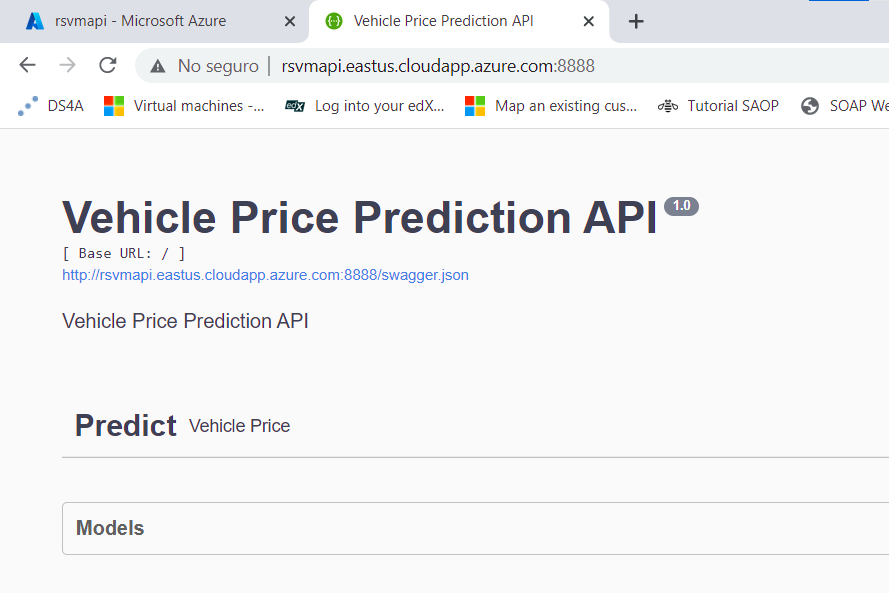

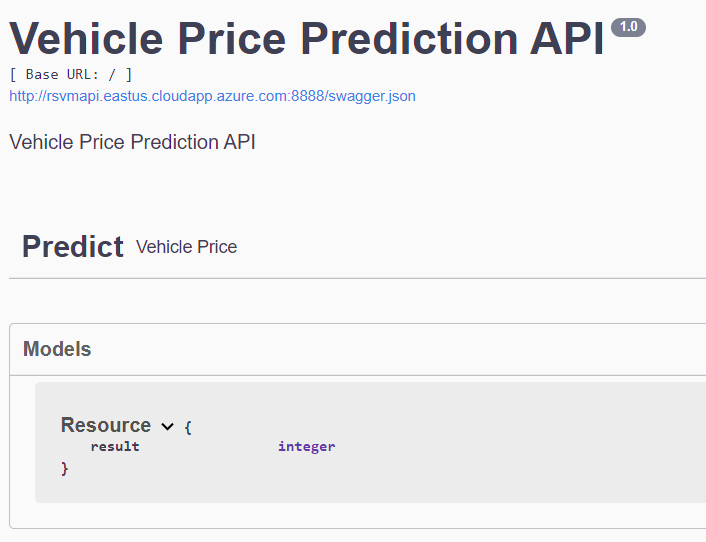

### Registro del response del microservicio

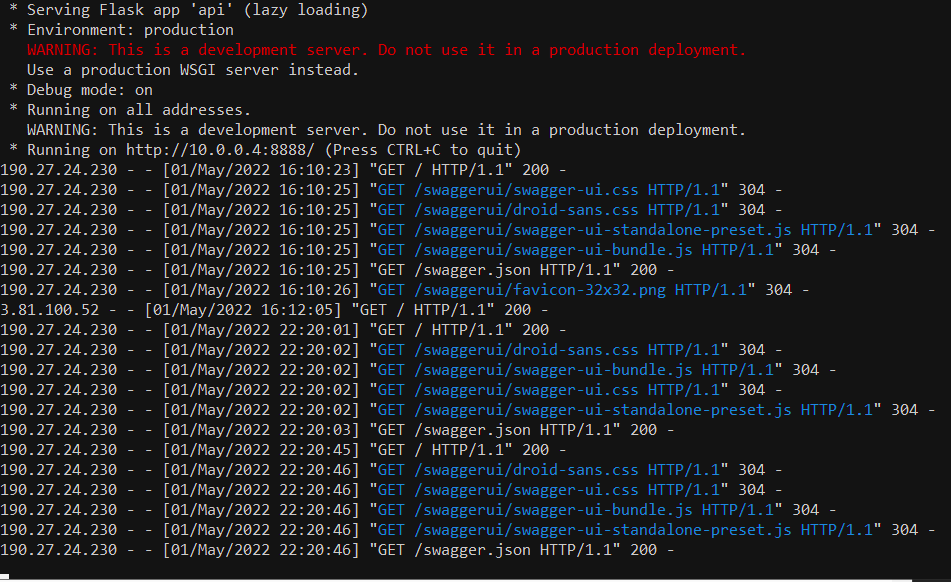

### Implementacion del metodo predictivo via GET

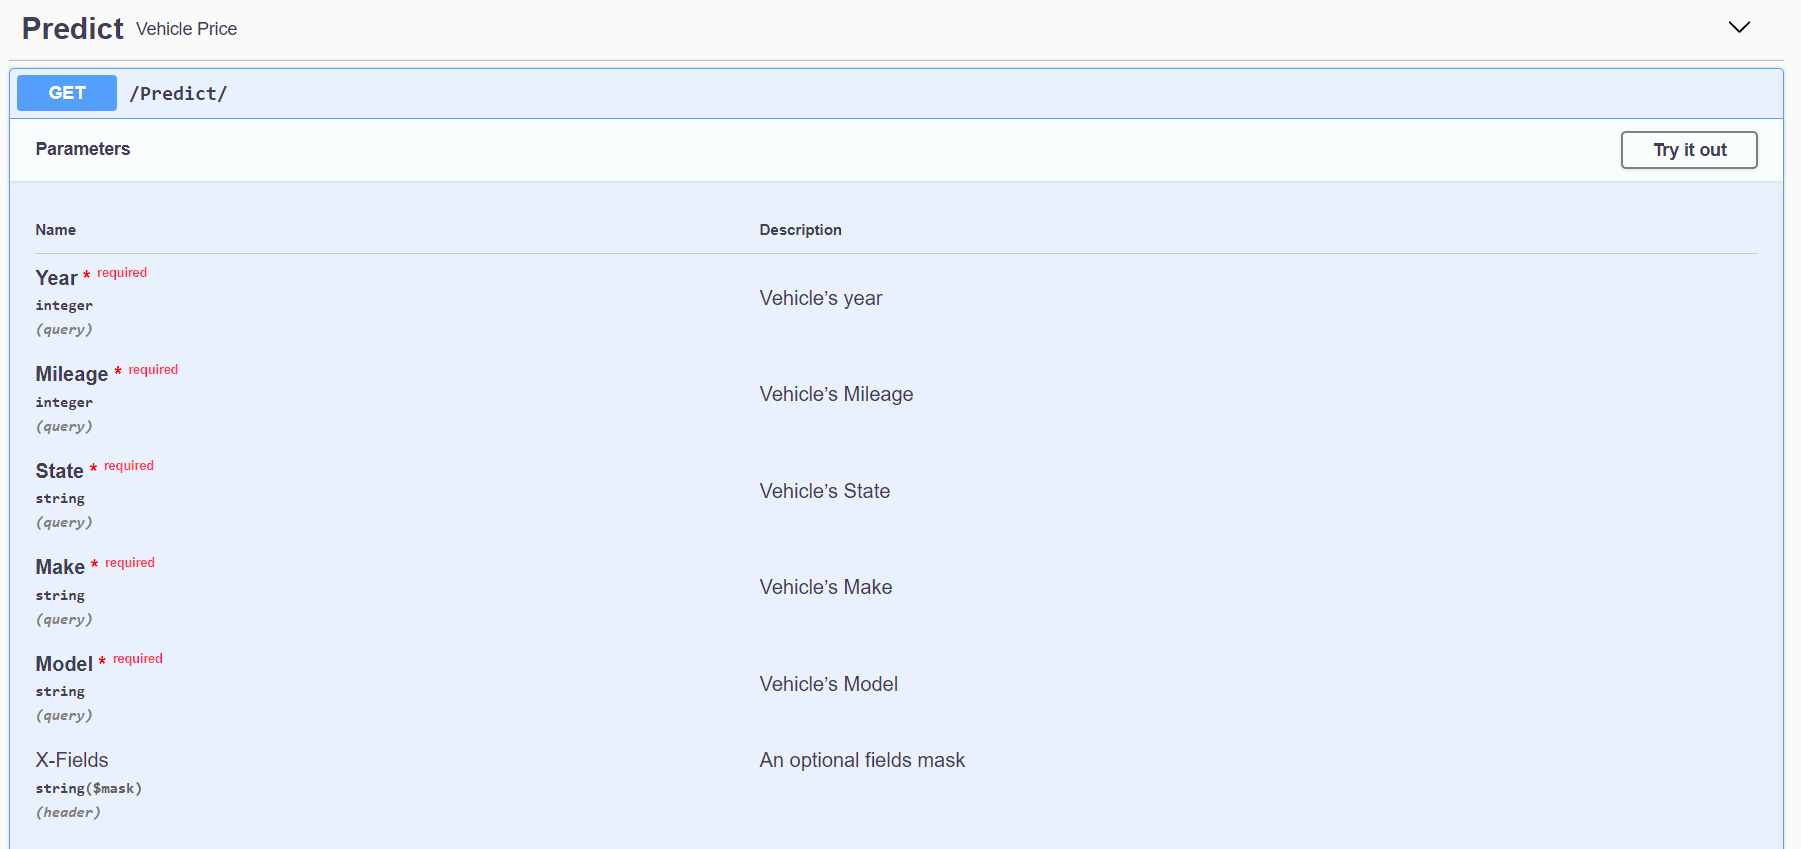

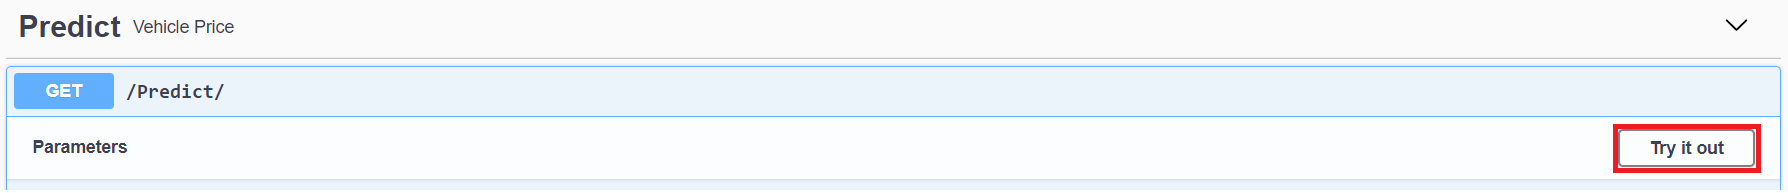

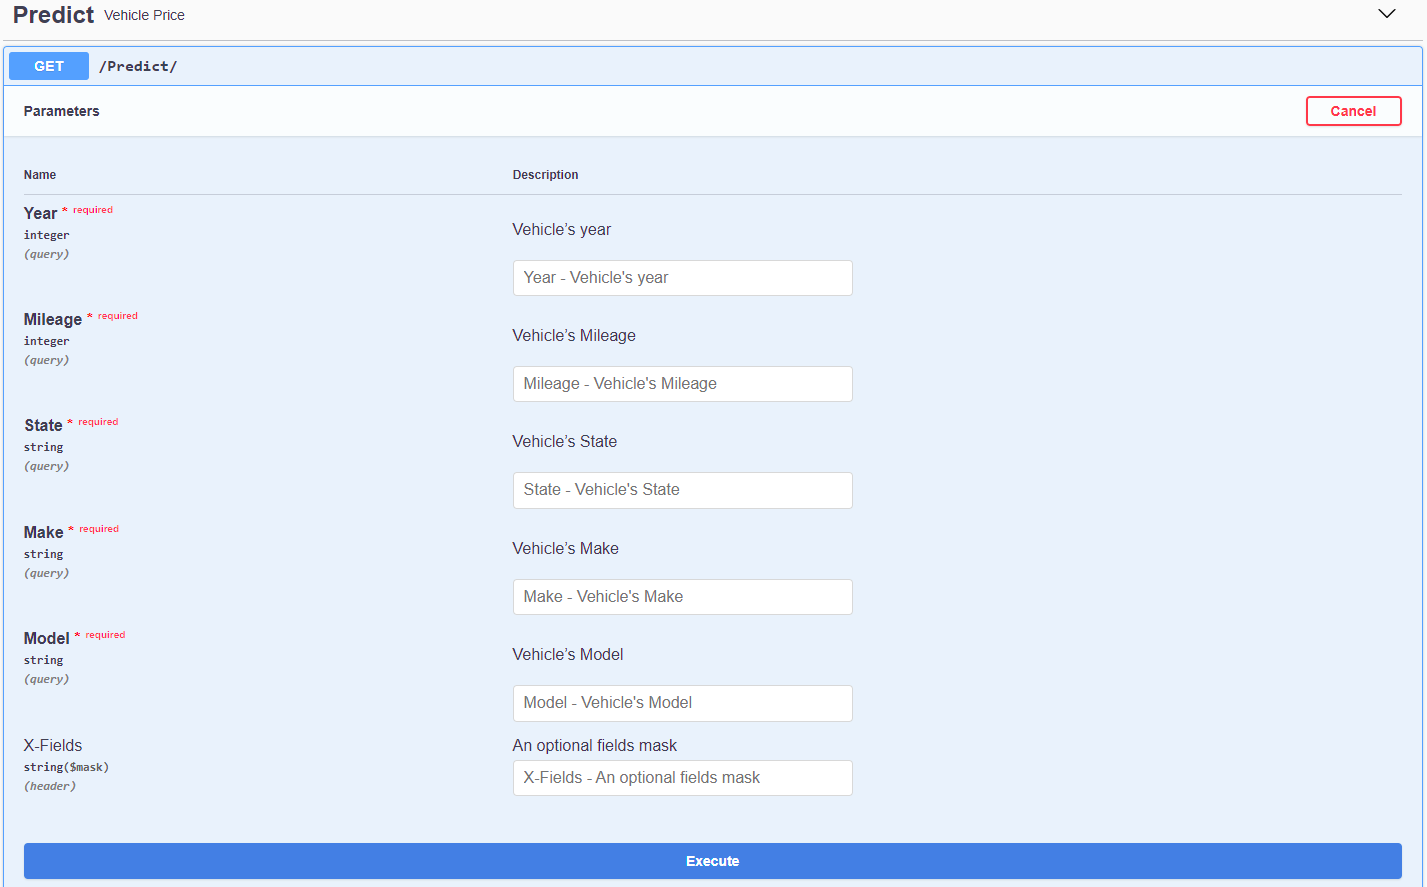

### Prediccion de una muestra del set de validacion


**Muestra**

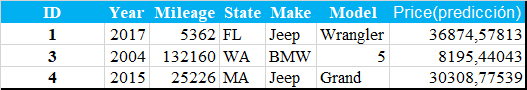


**Muestra a predecir (Regresion)**

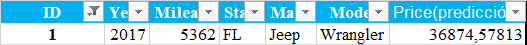

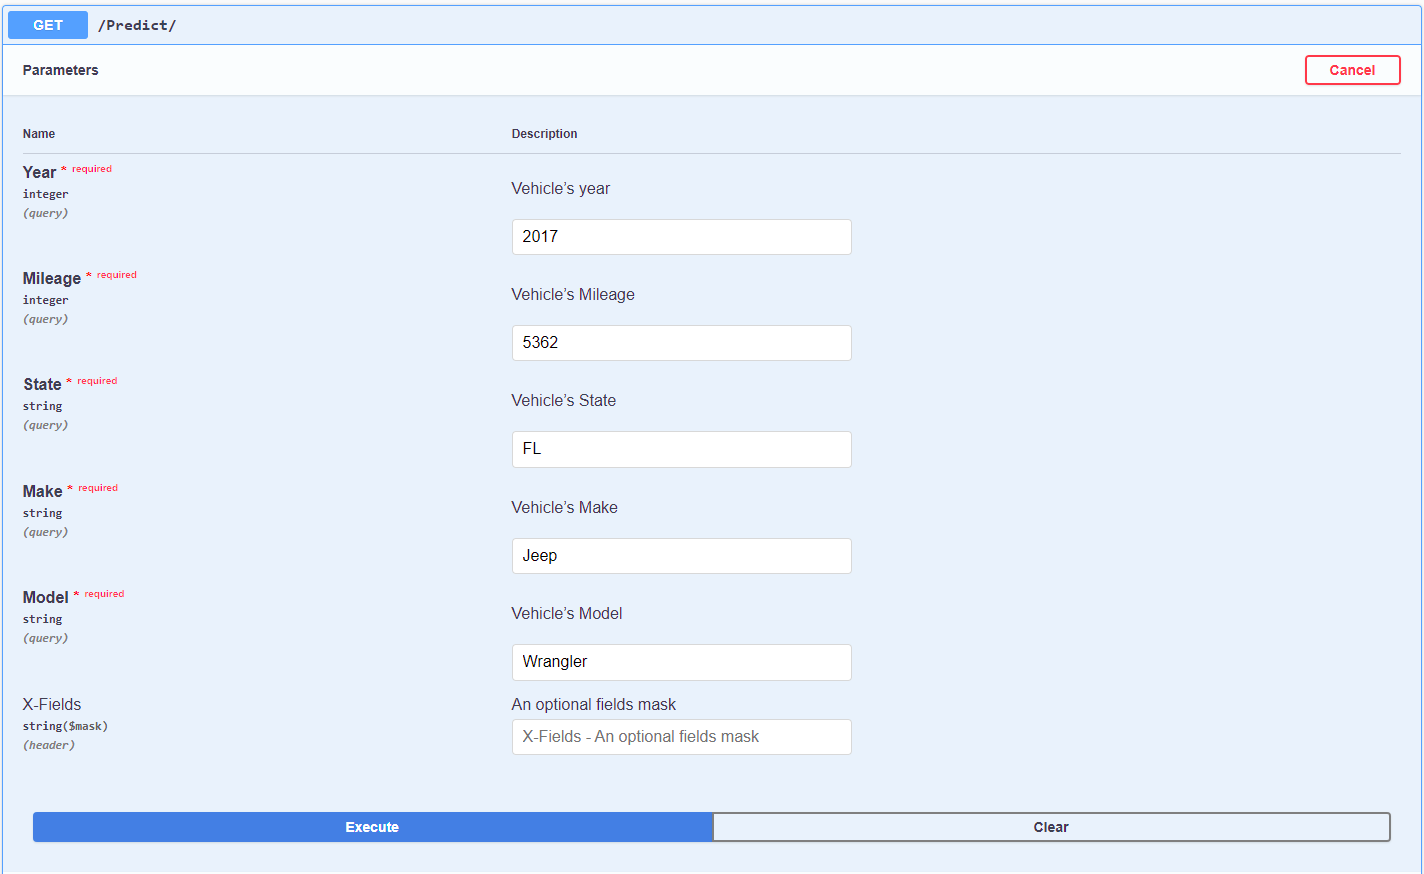

**Resultado: Registro del lado del servidor**

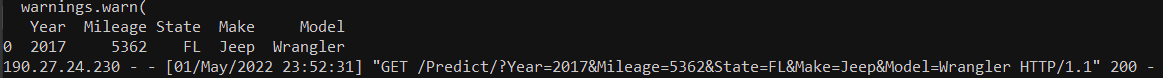

**Registro del lado del cliente**

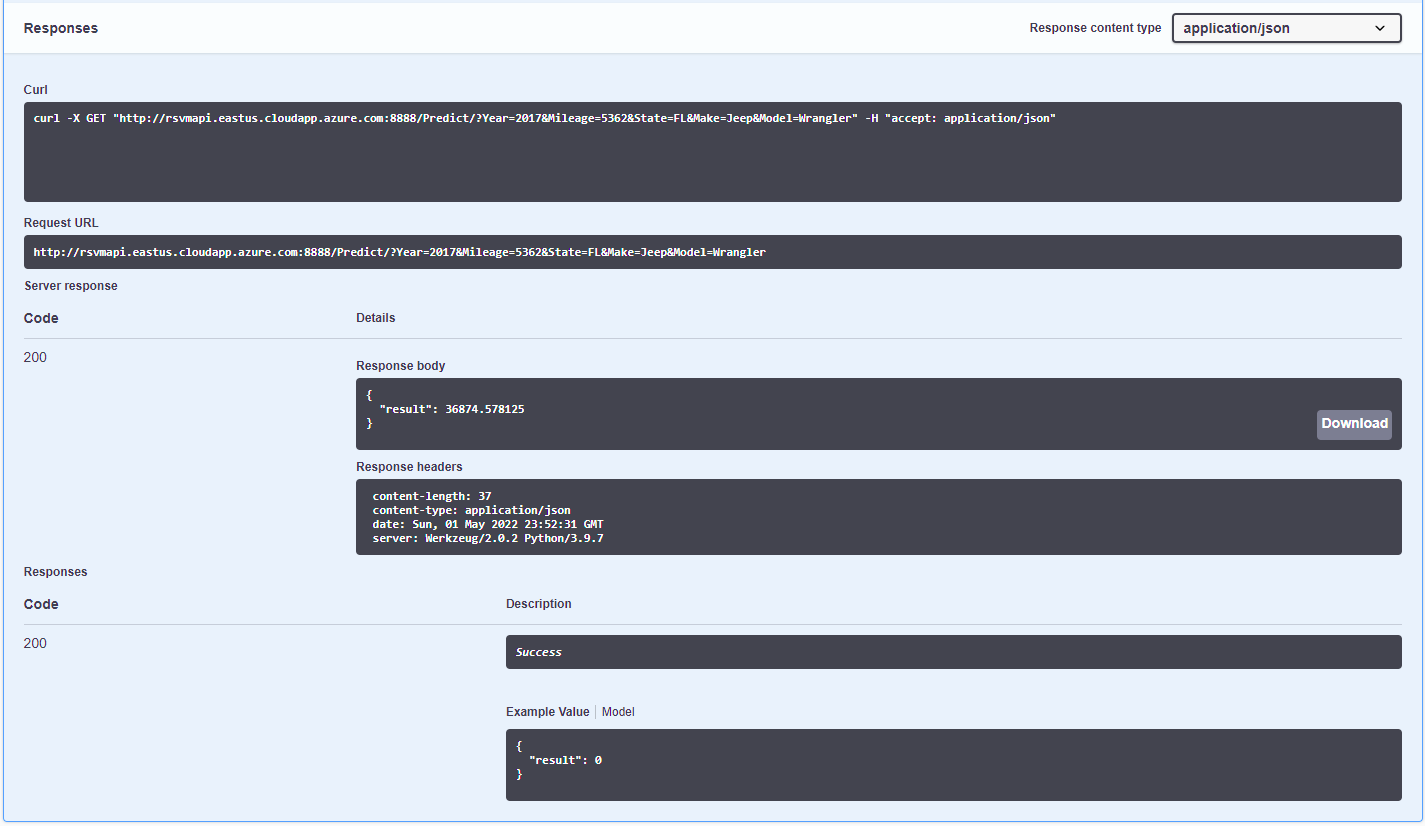

**Result - Price= 36874.57**

**Muestra a predecir (Regresion)**

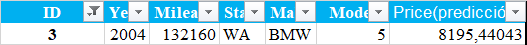

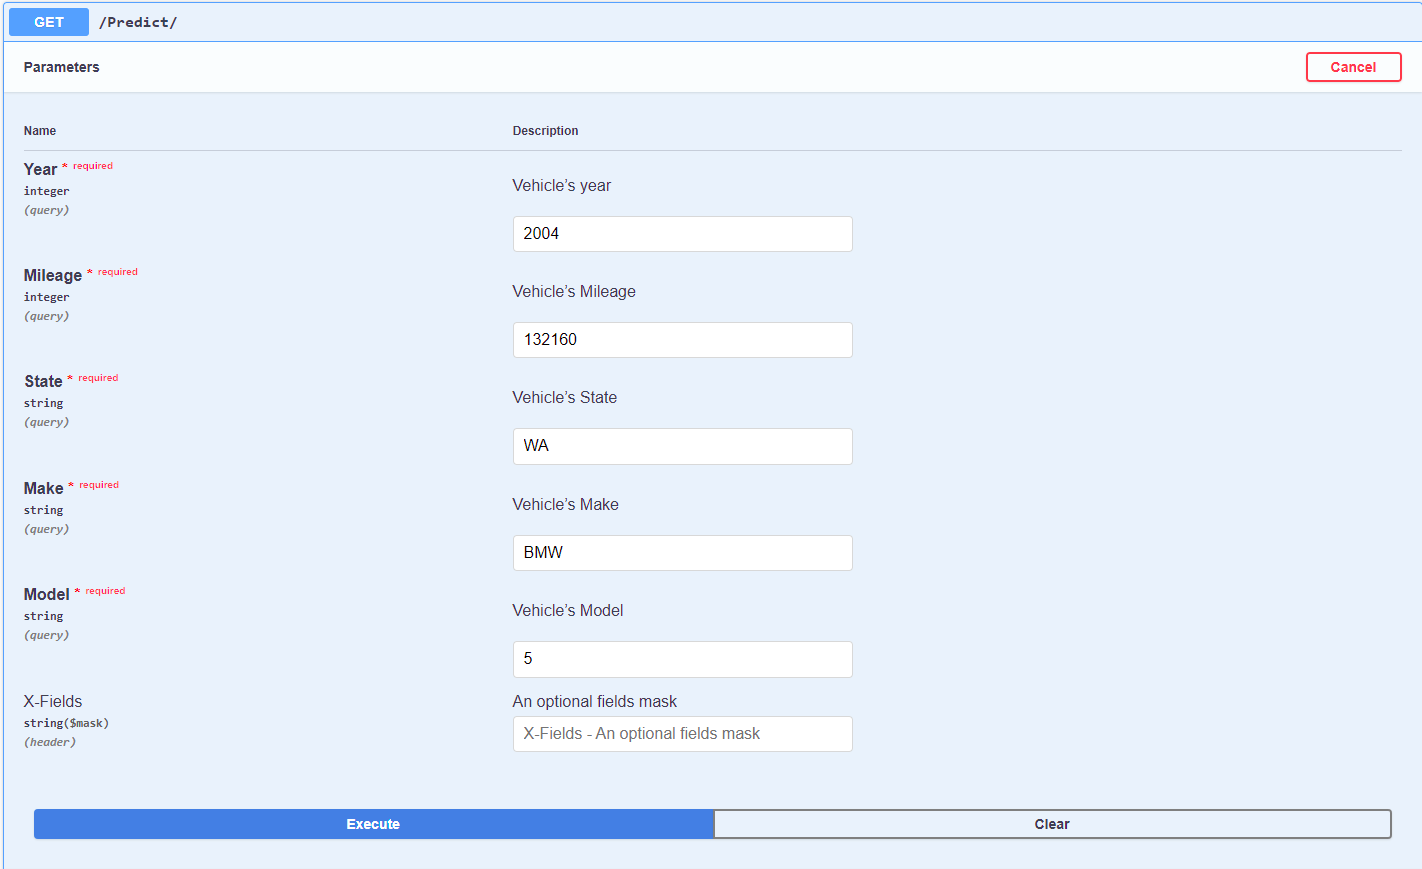

**Resultado: Registro del lado del servidor**

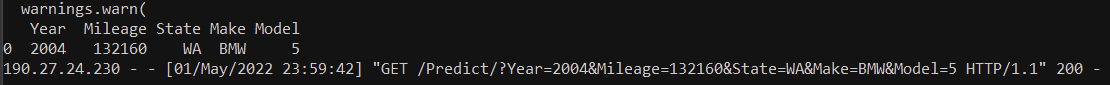

**Registro del lado del cliente**

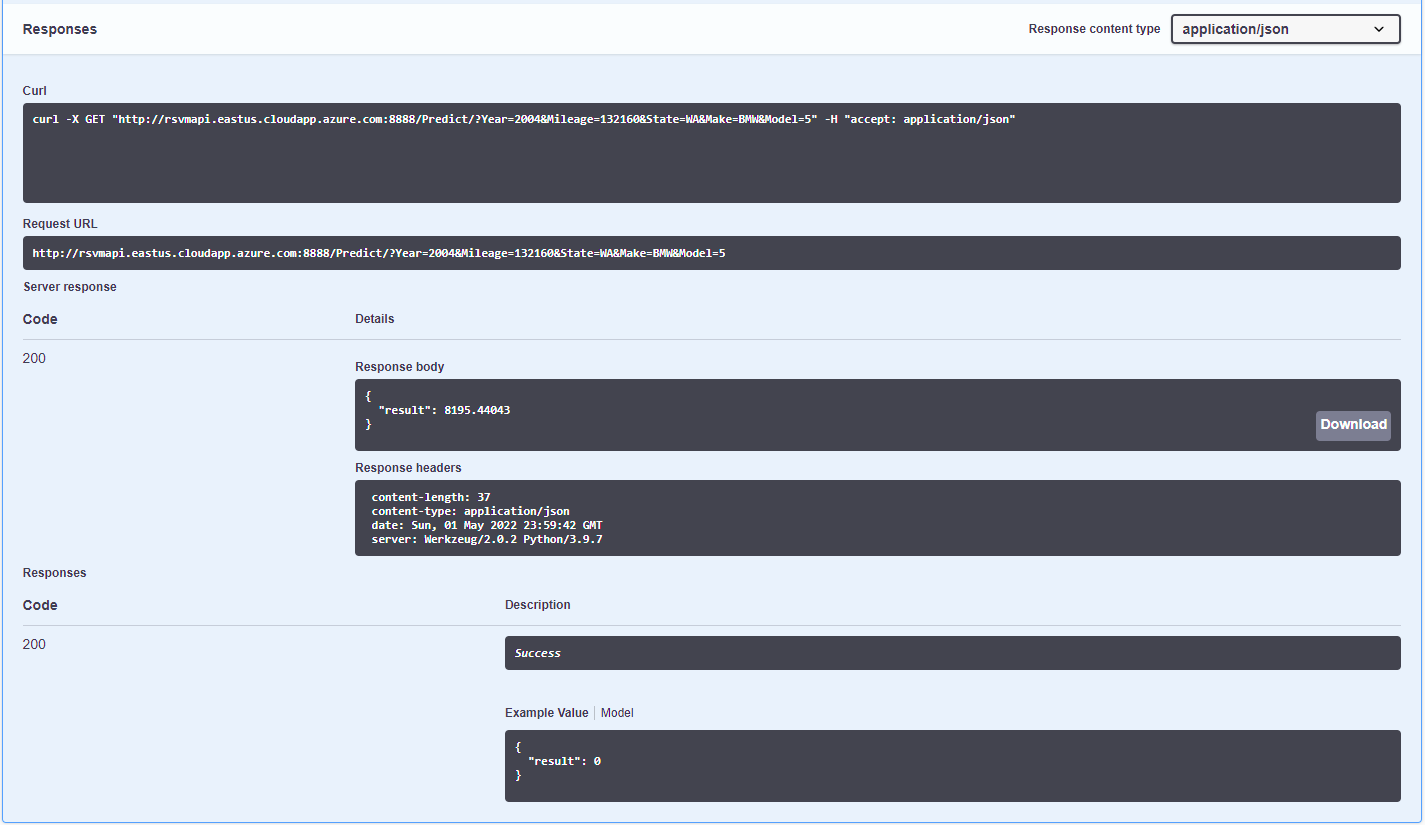

**Result - Price= 8195.44043**

**Muestra a predecir (Regresion)**

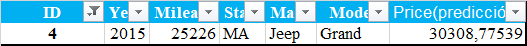

**Esta prediccion se realiza directamente sobre la URL del api**

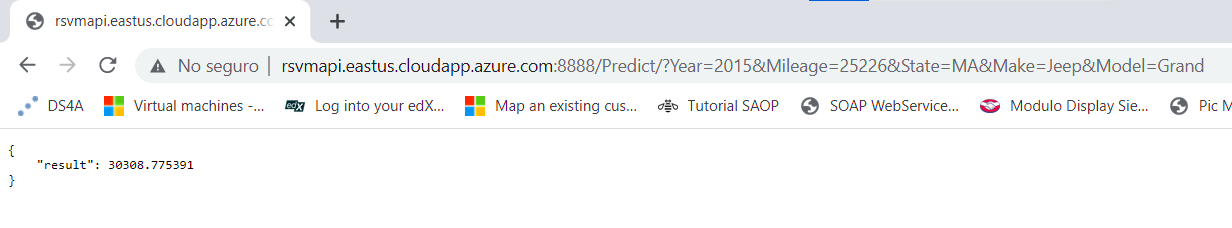

**Resultado: Registro del lado del servidor**

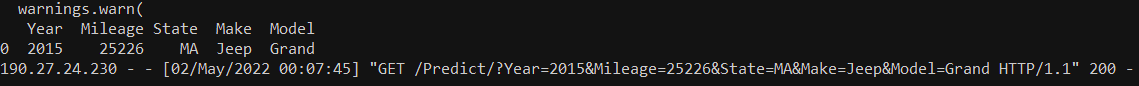